In [ ]:
# package useful for handling lightcurves - run this line in terminal 
#python -m pip install lightkurve --upgrade


In [1]:
#packages that are useful for our calculations
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Sine1D
# import lightkurve as lk


In [4]:
#Wien's Law lambda_peak = b/T
b = 2898 # μm*K - Wien's displacement constant

# Q: what is the peak wavelength of the balck body radiation curve -  lambda_peak -  for a star with a Teff = 5780K? what about 9600K? print results
# write here Wien's law for the specified temperature and click run


print(lambda_peak)

0.301875


In [ ]:
# Q what would the approximate Teff of a star be if lambda_peak = 1.087 micrometers; print results 
# write here the formula derived from Wien's law 

2.5**9

In [ ]:
# Q calculate the distances to the objects that have the following parallaxes; D = 1/parallax (''); print results
p_a = 0.13023 # arcseconds
p_b = 6.55 # miliarcseconds
p_c = 0.00378 # arcseconds



In [13]:
# Calculate the luminosities given the following stellar parameters with the formula L = 4 * np.pi * const_SB * 𝑅**2 * 𝑇**4 ; print result
const_SB = 5.670374419*10**(-8) # Stefan–Boltzmann constant in  W * m−2* K−4
radius_sun_m = 696340000 # Sun's radius in m 
Lum_sun  = 3.827 * 10**26 # Sun's luminosity in Watts
Teff_betelgeuse = 3600 #K
radius_betelgeuse = 764 # in solar radii
L = 
print(L)

0


In [15]:
Teff_rigel = 12100 #K
radius_rigel = 79 # in solar radii
L  =
print(L)

0


In [16]:
Teff_vega = 9600 #K
radius_vega = 2.362 # in solar radii
L = 
print(L)

0


In [17]:
Teff_barnard = 3150 #K
radius_barnard = 0.196 # in solar radii
L = 
print(L)


0


In [ ]:
# follow this link to place stars in an interactive diagram
https://astro.unl.edu/mobile/HRdiagram/HRdiagramStable.html

In [ ]:
# follow this link to see animations of stellar evolution
https://starinabox.lco.global/

In [ ]:
# kepler data 
# load data file from the following link
lightcurve_file= 'https://raw.githubusercontent.com/andreeaih/praktik2021nov/main/kepler_lightkurve_target1_filtered.csv'
# load data into a dataframe that python recognizes 
lc_data = pd.read_csv(lightcurve_file, sep=',')

# load data into a lightkurve object - the nice package we installed earlier
lightcurve = lk.LightCurve(time = lc_data.time.values, flux=lc_data.flux.values)


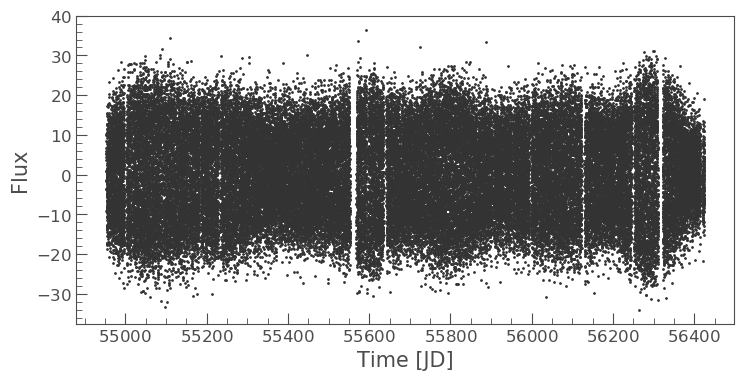

In [ ]:
# plot the lightcurve 
plot_err = lightcurve.scatter()
plt.show()

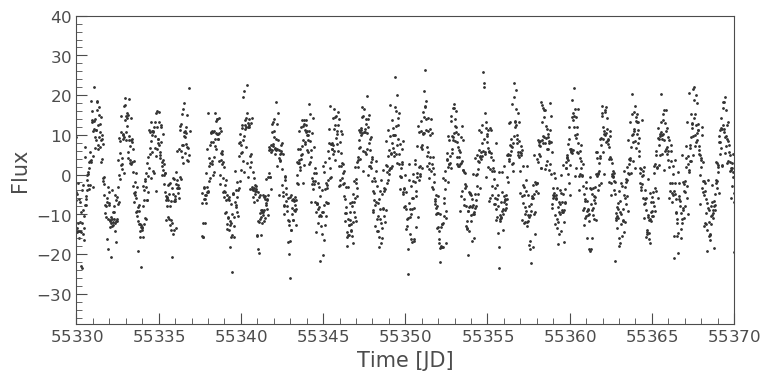

In [ ]:
#let's zoom in 
lightcurve.scatter()
plt.xlim(55330, 55370)
plt.show()

In [ ]:
# finding out the periodocity of the signals contained by the lightcurve through a periodogram 
pg = lightcurve.to_periodogram()

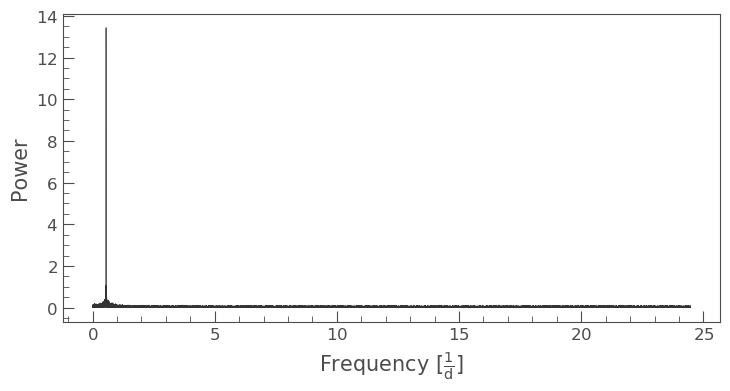

In [ ]:
# plotting the periodogram 
pg.plot()
plt.show()

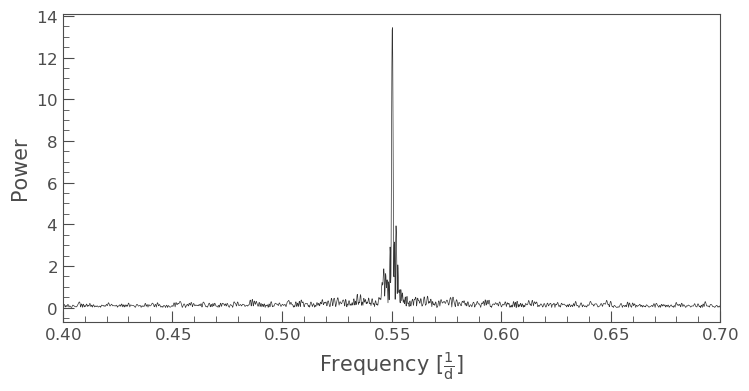

In [ ]:
# zoom in 
pg.plot()
plt.xlim(0.4, 0.7)
plt.show()
# plt.show()

In [ ]:
# extract the parameters of this signal 
period_signal = pg.period_at_max_power.value
frequency_signal = pg.frequency_at_max_power.value
amplitude_signal = pg.max_power.value

In [ ]:
# aproximate the signal with a sinus
sine = Sine1D(amplitude = pg.max_power.value, frequency=pg.frequency_at_max_power.value)


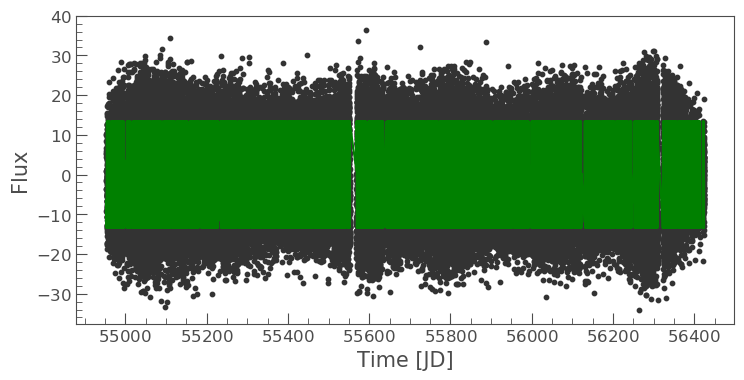

In [ ]:
#plot both the data and our sinus model 
lightcurve.scatter(s=40) # plotting the data s = the size of the symbols
plt.plot(lightcurve.time.value, sine(lightcurve.time.value), color='green') # this line is for plotting the model
plt.show()

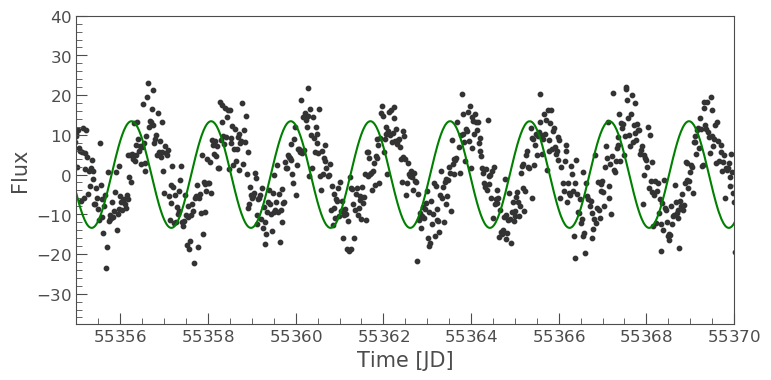

In [ ]:
# zooming in to see how well does the sine model represent the data 
lightcurve.scatter(s=40) # plotting the data s = the size of the symbols
plt.plot(lightcurve.time.value, sine(lightcurve.time.value), color='green') # this line is for plotting the model
plt.xlim(55355, 55370)
plt.show()

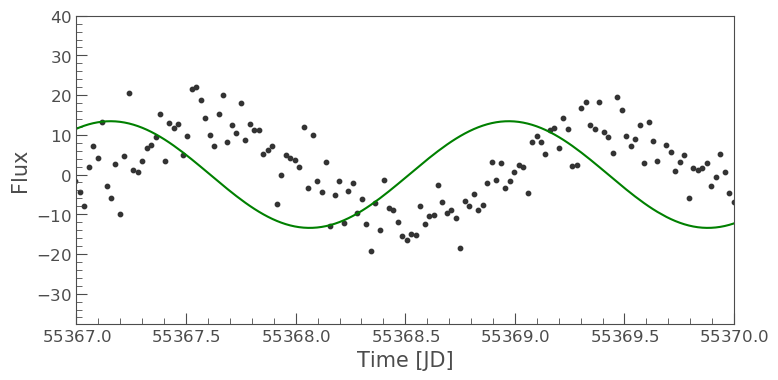

In [ ]:
# introducing a shift in our model - the phase
# but how much?
# a rough estimation ? - we need to zoom in a bit  more
lightcurve.scatter(s=40) # plotting the data s = the size of the symbols
plt.plot(lightcurve.time.value, sine(lightcurve.time.value), color='green') # this line is for plotting the model
plt.xlim(55367, 55370)
plt.show()



In [ ]:
phase_estimation = (period_signal - (68.5-68.1)) / period_signal

In [ ]:
phase_estimation

0.7798243385392284

In [ ]:
# create a model that constains the phase information
# aproximate the signal with a sinus
sine_2 = Sine1D(amplitude =amplitude_signal , frequency=frequency_signal, phase= phase_estimation)


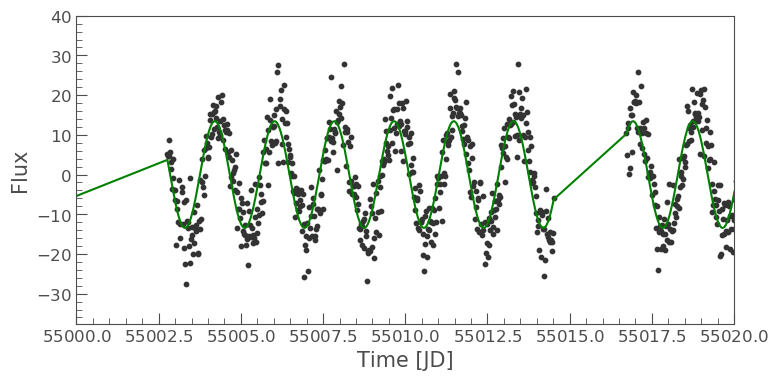

In [ ]:
#plot again the data and our new sinus model 
lightcurve.scatter(s=40) # plotting the data s = the size of the symbols
plt.plot(lightcurve.time.value, sine_2(lightcurve.time.value), color='green') # this line is for plotting the model
plt.xlim(55355, 55370)
plt.show()

In [ ]:
### Calculate the rotational velocity for this star in km/s with the following formula
# Vrot = freq_rot * 2 * np.pi * radius * radius_sun / (24 * 3600) 
radius_star = 2.212 # in solar radii
radius_sun_km = 696340 #km
Vrot = # ? 
print(Vrot)

61.65693190137252


In [ ]:
print("The star rotates around its own axis with {} km/s".format(round(Vrot, 1)))

The star rotates around its own axis with 61.7 km/s


In [ ]:
### Other lightcurves 
datafile2 = 'https://raw.githubusercontent.com/andreeaih/praktik2021nov/main/kepler_lightkurve_target2_filtered.csv'
datafile3 = 'https://raw.githubusercontent.com/andreeaih/praktik2021nov/main/file3_test.csv'